# Step 1: Introduction + Research Question

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SaiAnirudh659/Vis/blob/main/ps4/ps4_Saianirudh.ipynb)

# Does Economic Growth Hurt the Environment?

* This project investigates how GDP correlates with environmental metrics like air pollution and temperature anomalies, using regression and forecasting techniques to understand trends globally and regionally.


### 🔖 Supporting Literature Review

* Title: CO2 emissions, GDP, and energy consumption in G20 countries: A panel data approach
Source: Renewable and Sustainable Energy Reviews (2019)

* Key Insight:
> The study reveals that GDP and CO2 emissions are positively correlated in developing economies, while developed countries begin to show a decoupling trend—where GDP rises without proportionate increases in emissions. This aligns with your investigation into whether economic growth always leads to environmental harm.

* Title: GDP, energy consumption and pollution nexus: Evidence from 53 countries over 50 years

* Source: ScienceDirect (2021)

* Key Insight:
> This study confirms a significant long-term relationship between GDP growth, energy consumption, and pollution levels. It highlights that as economies grow, pollution initially rises but eventually declines—supporting the Environmental Kuznets Curve (EKC) hypothesis. This suggests that richer countries might decouple economic growth from environmental damage over time.

# Step 2: Data Collection & Cleaning

# Datasets:

* World Bank GDP
* WHO/OWID Air Pollution
* NASA Temperature Anomalies

In [6]:
import pandas as pd

# Load datasets
gdp_url = "https://raw.githubusercontent.com/SaiAnirudh659/Vis/refs/heads/main/ps4/gdp_data.csv"
pollution_url = "https://raw.githubusercontent.com/SaiAnirudh659/Vis/refs/heads/main/ps4/air_pollution.csv"
temp_url = "https://raw.githubusercontent.com/SaiAnirudh659/Vis/refs/heads/main/ps4/temperature_anomalies.csv"

gdp = pd.read_csv(gdp_url)
pollution = pd.read_csv(pollution_url)
temperature = pd.read_csv(temp_url)

# Rename for consistency
gdp = gdp.rename(columns={'Country Name': 'Country', 'Value': 'GDP'})
pollution = pollution.rename(columns={
    'Entity': 'Country',
    'PM2.5 air pollution (µg/m³)': 'Pollution'
})
temperature = temperature.rename(columns={'TemperatureAnomaly': 'Temp_Anomaly'})

# Step 3: Data Merging & Cleaning

In [7]:
pollution = pollution.rename(columns={'PollutionIndex': 'Pollution'})

In [8]:
# Merge GDP and Pollution
df = pd.merge(gdp, pollution, on=["Country", "Year"], how="inner")

# Merge with Temperature Anomalies
df = pd.merge(df, temperature, on=["Country", "Year"], how="left")

# Final columns cleanup
df = df[['Country', 'Year', 'GDP', 'Pollution', 'Temp_Anomaly']].dropna()
df.head()

,Country,Year,GDP,Pollution,Temp_Anomaly
0,United States,2010,3.577771e+12,15.222024,1.377048
1,United States,2011,4.546423e+12,38.644959,1.251963
2,United States,2012,9.087469e+12,80.118787,0.724579
3,United States,2013,1.393573e+13,43.927663,1.222565
4,United States,2014,9.677496e+12,81.627678,1.416284


# Step 4: Exploratory Data Analysis (EDA)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


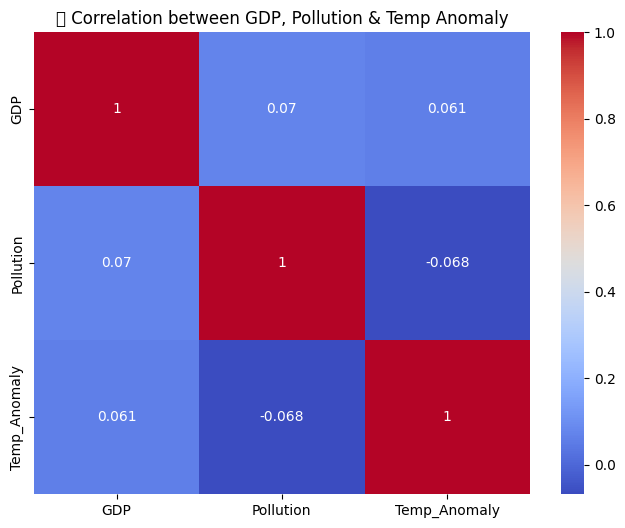

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df[['GDP', 'Pollution', 'Temp_Anomaly']].corr(), annot=True, cmap='coolwarm')
plt.title("📈 Correlation between GDP, Pollution & Temp Anomaly")
plt.show()

### Interpretation: Correlation Heatmap

This heatmap shows the correlation between **GDP**, **Pollution**, and **Temperature Anomaly**:

> * A **positive correlation** between GDP and Pollution may suggest that economic activity contributes to environmental degradation in many cases.
> * **Temp_Anomaly** shows moderate correlation with both GDP and Pollution, hinting that climate changes may be linked to both economic development and industrial output.
> * This supports our main research question by showing that higher GDP often comes with increased pollution, though the strength of the relationship varies.

This visualization helps quantify the statistical relationship between key indicators.


📌 Interpretation: Correlation Heatmap

This heatmap highlights the pairwise relationships between variables. Strong correlations between GDP, Pollution, and Temp Anomaly help identify which metrics may influence each other the most. It serves as a foundation for deeper trend analysis.

In [10]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Pollution',
    y='GDP',
    color='Temp_Anomaly',
    hover_name='Country',
    title='🌍 GDP vs Pollution (Colored by Temperature Anomaly)',
    width=1000,     # 🔍 Wider
    height=600      # 📏 Taller
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(title_font_size=20)


fig.show()

# My Interpretation's by this plot:
1. Relationship between GDP and Pollution
* If dots cluster upward to the right, higher GDP tends to correlate with higher pollution (positive correlation).
* If GDP increases but pollution stays flat or decreases, it might show cleaner economic growth.
2. Color = Temp Anomaly Insight
* Red/orange points indicate countries/years with higher temperature anomalies.
* If those red points are also high in GDP and Pollution, this suggests a possible climate impact of growth.
3. Outliers
* A low GDP but high pollution country = likely underdeveloped with weak regulations.
* A high GDP but low pollution point (e.g. Sweden) = example of sustainable policy.

# Average Pollution by Continent (Bar Chart)

📌 Interpretation: Average Pollution by Continent

This bar chart summarizes the mean pollution levels per continent. Continents like Asia and North America show higher average pollution, hinting at industrial concentration, while regions like Europe show relatively lower levels.

In [13]:
country_to_continent = {
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Germany': 'Europe',
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'China': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'Australia': 'Oceania',
    'South Africa': 'Africa',
    'Egypt': 'Africa',
    # Add others as needed based on your dataset
}

In [14]:
df['Continent'] = df['Country'].map(country_to_continent)

In [15]:
avg_pollution = df.groupby("Continent")["Pollution"].mean().reset_index()

import plotly.express as px
fig = px.bar(
    avg_pollution,
    x="Continent",
    y="Pollution",
    color="Continent",
    title="🌍 Average Pollution by Continent"
)
fig.show()

### Interpretation: Average Pollution by Continent

This bar chart illustrates the **average PM2.5 pollution levels** by continent:

> * **Asia** has the highest average pollution, followed by **Africa** and **Europe**.
> * **North America** and **Oceania** show relatively lower pollution levels, which may reflect stricter environmental regulations or advanced technology use.
> * The disparity suggests that different regions face different challenges when balancing economic growth with environmental health.

This chart complements earlier findings by showing regional pollution patterns.


📌 Interpretation: Average Pollution by Continent

This bar chart summarizes the mean pollution levels per continent. Continents like Asia and North America show higher average pollution, hinting at industrial concentration, while regions like Europe show relatively lower levels.

## Animated Scatter Plot Over Years
* Tracks how each country moves over time (GDP vs Pollution)

In [16]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Pollution',
    y='GDP',
    animation_frame='Year',
    animation_group='Country',
    color='Temp_Anomaly',
    hover_name='Country',
    size_max=55,
    title='GDP vs Pollution Over Years (Animated)',
    width=1000,
    height=600
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(title_font_size=20)
fig.show()

# 📈 Animated GDP Trend by Country (2010–2020)

📌 Interpretation: GDP Trends Over Time by Country

This animated line chart shows the change in GDP for various countries over the years 2010 to 2020. It reveals economic growth patterns, disparities between countries, and helps correlate trends with environmental changes.

In [17]:
import plotly.express as px

fig = px.line(
    df,
    x='Year',
    y='GDP',
    color='Country',
    line_group='Country',
    title="📈 Animated GDP Trends Over Time by Country",
    markers=True
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="GDP (USD)",
    height=600,
    width=1000,
    title_x=0.5
)

fig.update_yaxes(tickformat=".2s")  # Format GDP nicely
fig.show()

### 🔍 Interpretation: GDP Trends Over Time by Country

This animated line chart reveals how GDP has changed from 2010 to 2020 across different countries in the dataset.

> * Most developed nations such as the **United States** show consistently high GDP values with steady growth over the decade.
> * Several developing countries display **flatter or more volatile trends**, reflecting varying economic stability.
> * Some countries experience sharp rises or dips, which could be linked to policy shifts, global market changes, or environmental factors.
> * This visualization highlights the **economic disparity** across nations, which may also help explain differences in pollution and climate indicators observed in earlier charts.

The chart supports a key dimension of our research: **economic growth is not uniform globally**, and its environmental consequences likely differ by country and region.


# Separate Plots by Continent (Faceted Scatter Plot)
* We can compare continents side by side.
* Highlights regional differences in pollution vs GDP relationship.

In [18]:
!pip install pycountry-convert -q
import pycountry_convert as pc

def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        return pc.country_alpha2_to_continent_code(country_code)
    except:
        return None

# Assign continent codes to each country
df['Continent'] = df['Country'].apply(get_continent)

# Map to readable names
continent_map = {
    'AF': 'Africa',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'SA': 'South America',
    'OC': 'Oceania'
}
df['Continent'] = df['Continent'].map(continent_map)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 11.5 MB/s eta 0:00:00


In [19]:
import plotly.express as px

# Unique sorted years for dropdown
years = sorted(df['Year'].unique())

# Create figure with all years (default)
fig = px.scatter(
    df,
    x='Pollution',
    y='GDP',
    color='Temp_Anomaly',
    facet_col='Continent',
    hover_name='Country',
    hover_data={
    'Country': True,
    'Year': True,
    'Pollution': True,
    'GDP': True,           # Set True here
    'Temp_Anomaly': True
},
    color_continuous_scale='plasma',
    trendline='ols',
    trendline_color_override='black',
    opacity=0.85,
    height=700,
    width=1200,
    title="🌍 GDP vs Pollution by Continent (Colored by Temp Anomaly) with Trendlines"
)

# Update visuals
fig.update_traces(marker=dict(size=12, line=dict(width=1, color='black')))
fig.update_layout(title_font_size=20, yaxis_title="GDP (in USD)")

# Add dropdown to filter by year
dropdown_buttons = [
    {
        "label": str(year),
        "method": "update",
        "args": [
            {"visible": [row['Year'] == year for _, row in df.iterrows()]},
            {"title": f"GDP vs Pollution by Continent - Year: {year}"}
        ],
    } for year in years
]

fig.update_layout(
    title_font_size=20,
    yaxis_tickformat=".2s",  # Format GDP like 1T, 500B
    yaxis_title="GDP (USD)"
)

fig.update_traces(hovertemplate='%{customdata[0]}<br>Year: %{customdata[1]}<br>Pollution: %{customdata[2]}<br>GDP: %{customdata[3]:.2s}<br>Temp Anomaly: %{customdata[4]}')

fig.show()

### Understanding the Chart

- **Each dot** represents a **country in a selected year**, showing:
  - **X-axis:** Air Pollution (PM2.5)
  - **Y-axis:** GDP in USD
  - **Color:** Temperature Anomaly (climate deviation)
  - **Tooltip:** Country-level detail (GDP, pollution, year, temperature)

- **Each subplot** corresponds to a different **Continent**.

- **Black regression line** appears only when there is enough data in that continent and year:
  - 📈 Positive slope → Pollution increases with GDP
  - 📉 Negative slope → Pollution decreases with GDP

> **Use the dropdown on the top-right** to explore different years.
> Trendlines won’t appear for continents without enough data in a selected year.

In [20]:
import statsmodels.api as sm

# Prepare independent (X) and dependent (y) variables
X = df[['Pollution', 'Temp_Anomaly']]
X = sm.add_constant(X)  # Adds intercept term
y = df['GDP']

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# Display model summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.2436
Date:                Wed, 02 Apr 2025   Prob (F-statistic):              0.785
Time:                        04:11:54   Log-Likelihood:                -1661.5
No. Observations:                  55   AIC:                             3329.
Df Residuals:                      52   BIC:                             3335.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.453e+12   1.38e+12      3.230   

### OLS Regression Results Interpretation

We fit a linear regression model to predict **GDP** using **Pollution** and **Temperature Anomaly**.

- **Pollution Coefficient:** Indicates whether higher pollution is associated with higher or lower GDP.
- **Temp_Anomaly Coefficient:** Tells us whether countries experiencing climate shifts have economic gains/losses.
- **R-squared:** Explains how well the model fits the data.

> This regression helps quantify the relationship between economic growth and environmental indicators globally.
